In [5]:
import h5py
import numpy as np
import pandas as pd # If you want to cross-reference with your metadata CSV
import matplotlib.pyplot as plt

# --- Configuration ---
hdf5_path = "/home/elie/Projects/Work/chromatogram_extraction/test_results/output.hdf5" # <-- Make sure this path is correct
metadata_csv_path = "/home/elie/Projects/Work/chromatogram_extraction/test_results/output_metadata.csv" # <-- Optional, but useful

# --- Open the HDF5 file (read mode) ---
try:
    h5_file = h5py.File(hdf5_path, 'r')
    print(f"Successfully opened: {hdf5_path}")
except Exception as e:
    print(f"Error opening {hdf5_path}: {e}")
    # Stop execution if file can't be opened
    raise SystemExit("Cannot open HDF5 file")

Successfully opened: /home/elie/Projects/Work/chromatogram_extraction/test_results/output.hdf5


In [6]:
print("\nAvailable Sample Groups:")
sample_names = list(h5_file.keys())
print(sample_names)


Available Sample Groups:
['001227_J0_PH_1', '001241_J0_PH_1', '001251_J1_PH_1', '001273_J0_PH_1', '001282_J7', '001285_J1_PH_1', '001287_J1', '001289_J0', '001289_J1', '001314_J1', '001314_J7', '001315_J0_PH_1', '001317_J1', '005_028_J0_PH', '005_031_J0', '005_033_J0', '005_035_J0', '005_039_J7', '005_041_J1', '005_042_J1', '005_044_J1', '005_047_J7', '005_055_J1', '005_057_J7_PH_1', '005_060_J7', '005_064_J0', '011_008_J0_PH', '011_015_J0_PH', '011_036_J0_PH_1', '011_056_J1', '011_059_J0_PH_1', '011_065_J1', '011_066_J1', '011_067_J0', '011_068_J7_PH_1', '011_072_J7', '011_073_J1', '011_080_J0', '011_083_J7_PH_1', '012_0069_PA_J0_PH', '016_024_J0_PH', '016_028_J0_PH', '016_030_J0', '016_030_J1', '016_031_J1', '016_033_J0_PH_1', '016_034_J1', '016_036_J1', '016_039_J1_PH_1', 'G0-021222-reinj', 'G0-1-011122', 'G0-1-021122', 'G0-1-031122', 'G0-1-041222', 'G0-1-051122', 'G0-1-051222', 'G0-1-06122022', 'G0-1-07122022', 'G0-1-08122022', 'G0-1-091122', 'G0-1-09122022', 'G0-1-100123', 'G0-1-


Exploring Sample Group: 001227_J0_PH_1

Datasets in '001227_J0_PH_1':
['patch_09ec1f2a-afe9-41c0-941a-8d16a46e5e5e', 'patch_3094ebf4-30a3-4487-9de6-9b41536ab568', 'patch_59307e2b-6ee9-4bc8-91fd-5d9b408d1de2', 'patch_6ded1852-e96e-4b0a-9194-956bda35e9d9', 'patch_913baf48-6a98-4be7-bbeb-8157f83d3a40', 'patch_d8708ff7-9514-4713-97a9-d495a6dc9a83', 'patch_d8f7456b-b3d7-4fa8-8951-47d2c59cae19', 'patch_eb85c6d2-c38f-446d-b38e-bb863cd16048', 'patch_f7df79dc-8d4c-4820-b322-300b88522841', 'spectrum_09ec1f2a-afe9-41c0-941a-8d16a46e5e5e', 'spectrum_3094ebf4-30a3-4487-9de6-9b41536ab568', 'spectrum_59307e2b-6ee9-4bc8-91fd-5d9b408d1de2', 'spectrum_6ded1852-e96e-4b0a-9194-956bda35e9d9', 'spectrum_913baf48-6a98-4be7-bbeb-8157f83d3a40', 'spectrum_d8708ff7-9514-4713-97a9-d495a6dc9a83', 'spectrum_d8f7456b-b3d7-4fa8-8951-47d2c59cae19', 'spectrum_eb85c6d2-c38f-446d-b38e-bb863cd16048', 'spectrum_f7df79dc-8d4c-4820-b322-300b88522841']

Examining Patch Dataset: patch_09ec1f2a-afe9-41c0-941a-8d16a46e5e5e
  Sh

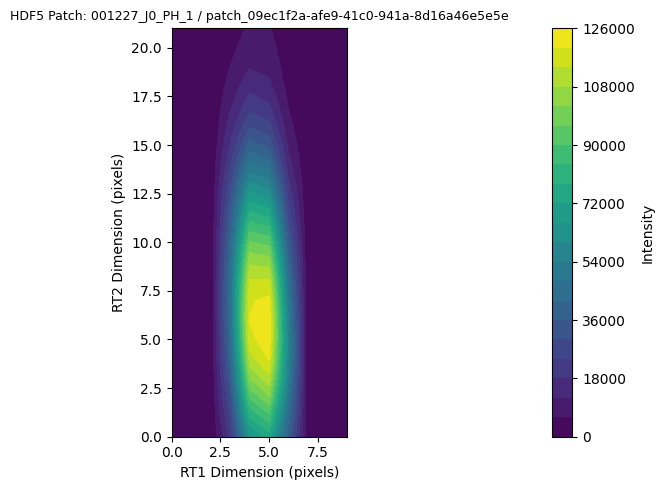


Examining Spectrum Dataset: spectrum_09ec1f2a-afe9-41c0-941a-8d16a46e5e5e
  Shape: (461,)
  Data type: float64
  Length: 461
  Max intensity: 2168930.44


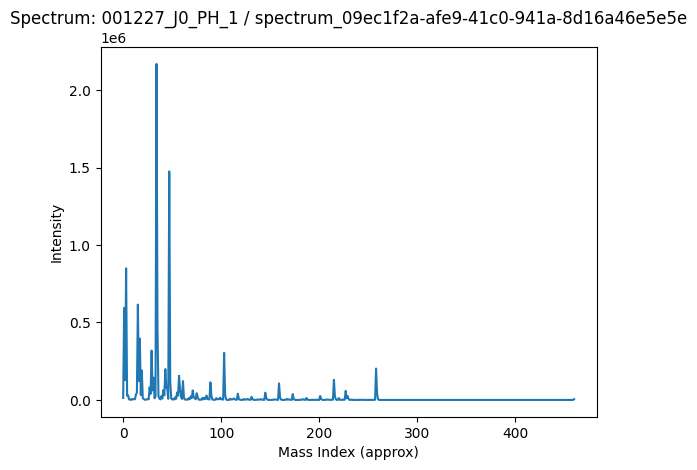


Closed HDF5 file.


In [7]:
if sample_names:
    sample_to_explore = sample_names[0] # Just taking the first one as an example
    print(f"\nExploring Sample Group: {sample_to_explore}")
    try:
        sample_group = h5_file[sample_to_explore]

        # 3. List datasets within this sample group
        print(f"\nDatasets in '{sample_to_explore}':")
        dataset_names = list(sample_group.keys())
        print(dataset_names)

        # 4. Select a specific patch dataset to examine (find a patch ID from the list)
        #    Let's try finding the first patch dataset
        first_patch_id = None
        for name in dataset_names:
            if name.startswith('patch_'):
                first_patch_id = name
                break

        if first_patch_id:
            print(f"\nExamining Patch Dataset: {first_patch_id}")
            patch_dataset = sample_group[first_patch_id]

            # 5. Check its properties (without reading all data yet)
            print(f"  Shape: {patch_dataset.shape}")
            print(f"  Data type: {patch_dataset.dtype}")
            print(f"  Compression: {patch_dataset.compression}")

            # 6. Read the data into a NumPy array
            patch_data = patch_dataset[()] # Use [()] to read data

            # 7. Check basic stats (optional)
            if patch_data.size > 0:
                 print(f"  Min intensity: {np.min(patch_data):.2f}")
                 print(f"  Max intensity: {np.max(patch_data):.2f}")
                 print(f"  Mean intensity: {np.mean(patch_data):.2f}")
            else:
                 print("  Patch data is empty.")

            # 8. Visualize this specific patch (using contourf like before)
            if patch_data.size > 0:
                print("\nVisualizing patch...")
                fig, ax = plt.subplots(figsize=(7, 5))
                plot_data = patch_data.T
                levels = 20
                contour_plot = ax.contourf(plot_data, levels=levels, cmap='viridis')
                fig.colorbar(contour_plot, ax=ax, label='Intensity')
                # Try to get corresponding info from metadata CSV if needed for title
                # This requires loading the CSV and finding the matching unique_id
                title = f"HDF5 Patch: {sample_to_explore} / {first_patch_id}"
                ax.set_title(title, fontsize=9)
                ax.set_xlabel("RT1 Dimension (pixels)")
                ax.set_ylabel("RT2 Dimension (pixels)")
                ax.axis('image')
                fig.tight_layout()
                plt.show() # Show the plot

        else:
            print(f"No patch datasets found in sample '{sample_to_explore}'.")

        # You can do similar steps for a spectrum dataset...
        # Find first spectrum ID
        first_spectrum_id = None
        for name in dataset_names:
             if name.startswith('spectrum_'):
                  first_spectrum_id = name
                  break
        if first_spectrum_id:
             print(f"\nExamining Spectrum Dataset: {first_spectrum_id}")
             spectrum_dataset = sample_group[first_spectrum_id]
             print(f"  Shape: {spectrum_dataset.shape}")
             print(f"  Data type: {spectrum_dataset.dtype}")
             spectrum_data = spectrum_dataset[()]
             if spectrum_data.size > 0:
                  print(f"  Length: {len(spectrum_data)}")
                  print(f"  Max intensity: {np.max(spectrum_data):.2f}")
                  # Optionally plot the spectrum
                  plt.figure()
                  plt.plot(spectrum_data)
                  plt.title(f"Spectrum: {sample_to_explore} / {first_spectrum_id}")
                  plt.xlabel("Mass Index (approx)")
                  plt.ylabel("Intensity")
                  plt.show()


    except KeyError:
        print(f"Error: Sample group '{sample_to_explore}' not found.")
    except Exception as e:
        print(f"An error occurred while exploring '{sample_to_explore}': {e}")

# --- Close the file when done exploring ---
h5_file.close()
print("\nClosed HDF5 file.")
